In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df=pd.read_csv("cluster_moons.csv")
df

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164
...,...,...
1495,1.957344,0.187184
1496,0.962394,0.384304
1497,-0.761893,0.581666
1498,1.803858,-0.154705


In [9]:
print(df.columns)

Index(['X1', 'X2'], dtype='object')


In [13]:
print("Available columns:", df.columns)

Available columns: Index(['X1', 'X2'], dtype='object')


In [17]:
if 'X1' not in df.columns or 'X2' not in df.columns:
    raise KeyError("Dataset must contain columns 'X1' and 'X2'.")

if 'y' not in df.columns:
    print("Target column 'y' not found. Generating artificial labels...")
    df['y'] = np.where(df['X1'] + df['X2'] > 0, 1, 0)

Target column 'y' not found. Generating artificial labels...


In [21]:
X = df[['X1', 'X2']]
y = df['y']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

In [23]:
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"🔹 SVM (Linear Kernel) Accuracy: {accuracy_linear:.2f}")
print(f"🔹 SVM (RBF Kernel) Accuracy: {accuracy_rbf:.2f}")

🔹 SVM (Linear Kernel) Accuracy: 1.00
🔹 SVM (RBF Kernel) Accuracy: 1.00


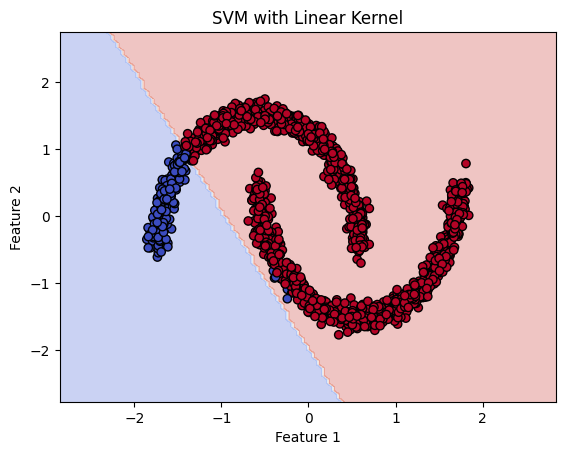

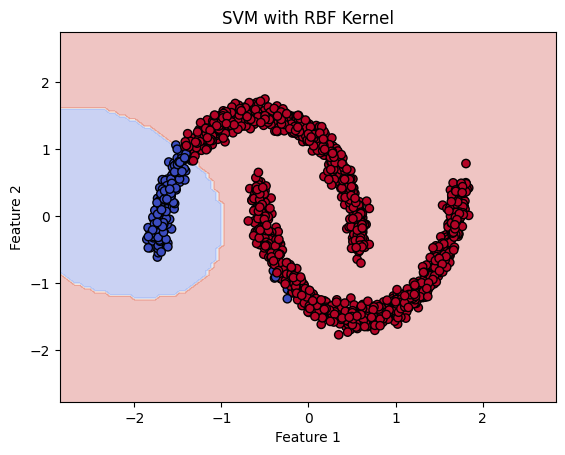

In [43]:
def plot_decision_boundary(model, X, y, title):
    if X.shape[1] != 2:
        raise ValueError("Decision boundary can only be plotted for 2D data.")

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(svm_linear, X_scaled, y, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_scaled, y, "SVM with RBF Kernel")